## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np
import statsmodels.api as sm

%matplotlib inline

# Q.1. 50_Startups

## Importing Data

In [3]:
df = pd.read_csv("50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## EDA

In [4]:
df.shape

(50, 5)

In [5]:
df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [8]:
data1=df.rename({'R&D Spend':'RDS','Administration':'ADMS','Marketing Spend':'MS'},axis=1)
data1

,RDS,ADMS,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [9]:
data1.describe()

,RDS,ADMS,MS,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


## Scatter Plot

<Figure size 576x576 with 0 Axes>

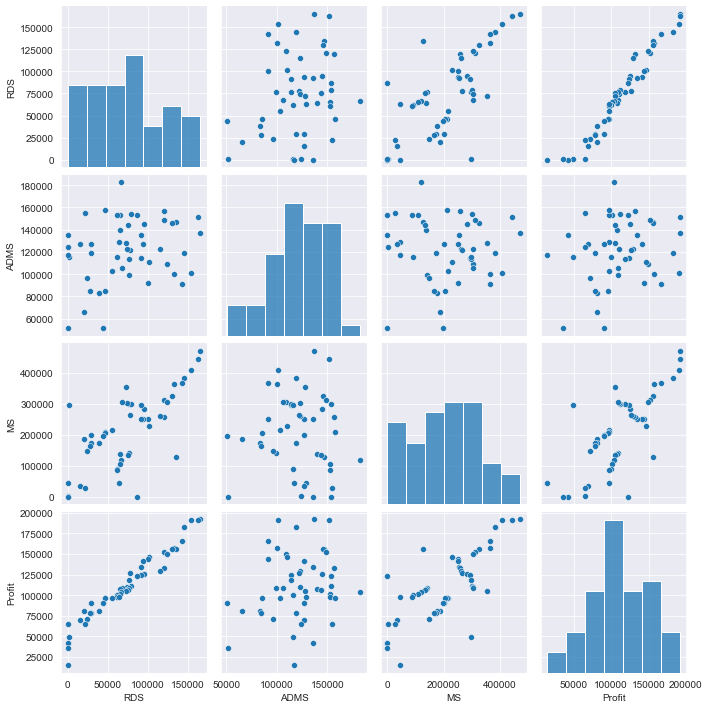

In [10]:
plt.figure(figsize=(8,8))
sns.set_style(style='darkgrid')
sns.pairplot(data1)

## Correlation Matrix

In [11]:
data1.corr()

,RDS,ADMS,MS,Profit
RDS,1.000000,0.241955,0.724248,0.972900
ADMS,0.241955,1.000000,-0.032154,0.200717
MS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


<AxesSubplot:>

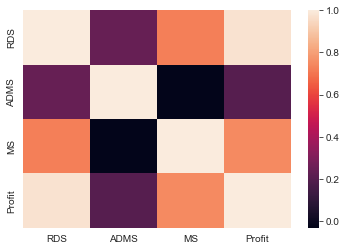

In [12]:
sns.heatmap(data1.corr())

## Building Model

In [13]:
model=smf.ols("Profit~RDS+ADMS+MS",data=data1).fit()

In [14]:
model.params

Intercept    50122.192990
RDS              0.805715
ADMS            -0.026816
MS               0.027228
dtype: float64

In [15]:
model.rsquared

0.9507459940683246

In [16]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Fri, 13 Jan 2023   Prob (F-statistic):           4.53e-30
Time:                        13:30:31   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RDS            0.8057      0.045     17.846      0.000       0.715       0.897
ADMS          -0.0268      0.051     -0.526      0.602      -0.130       0.076
MS             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
model.tvalues

Intercept     7.626218
RDS          17.846374
ADMS         -0.525507
MS            1.655077
dtype: float64

In [18]:
model.pvalues

Intercept    1.057379e-09
RDS          2.634968e-22
ADMS         6.017551e-01
MS           1.047168e-01
dtype: float64

In [19]:
model.rsquared,model,model.rsquared_adj

(0.9507459940683246,
 0.9475337762901719)

## Calculating VIF

In [20]:
rsq_rds = smf.ols('RDS~ADMS+MS',data=data1).fit().rsquared  
vif_rds = 1/(1-rsq_rds)

rsq_adms = smf.ols('ADMS~RDS+MS',data=data1).fit().rsquared  
vif_adms = 1/(1-rsq_adms) 

rsq_ms = smf.ols('MS~RDS+ADMS',data=data1).fit().rsquared  
vif_ms = 1/(1-rsq_ms) 

# Storing vif values in a data frame
d1 = {'Variables':['RDS','ADMS','MS'],'VIF':[vif_rds,vif_adms,vif_ms]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,RDS,2.468903
1,ADMS,1.175091
2,MS,2.326773


## Residual Analysis

### Test for Normality of Residuals (Q-Q Plot)

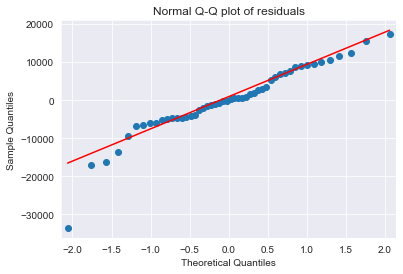

[array([49], dtype=int64)]

In [21]:
sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

list(np.where(model.resid<-30000))

### Residual Plot for Homoscedasticity

In [22]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

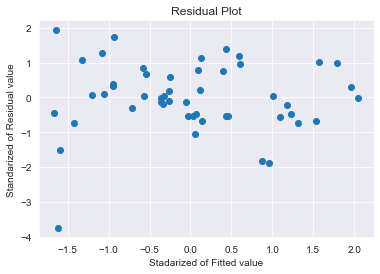

In [23]:
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel("Stadarized of Fitted value")
plt.ylabel("Standarized of Residual value")
plt.show()

### Residual Vs Regressors

eval_env: 1


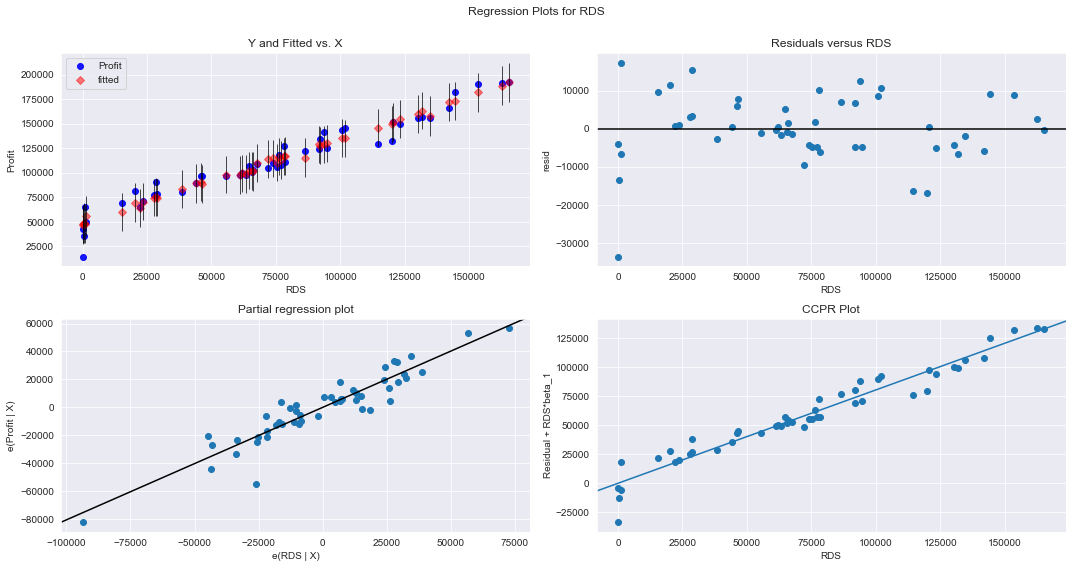

In [24]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, "RDS", fig=fig)
plt.show()

eval_env: 1


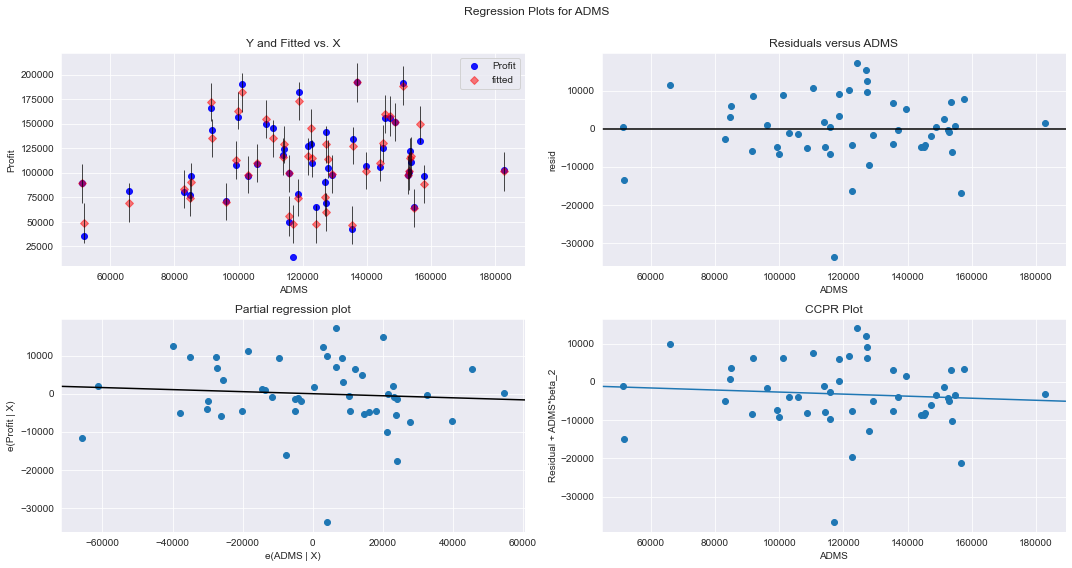

In [25]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,"ADMS", fig=fig)
plt.show()

eval_env: 1


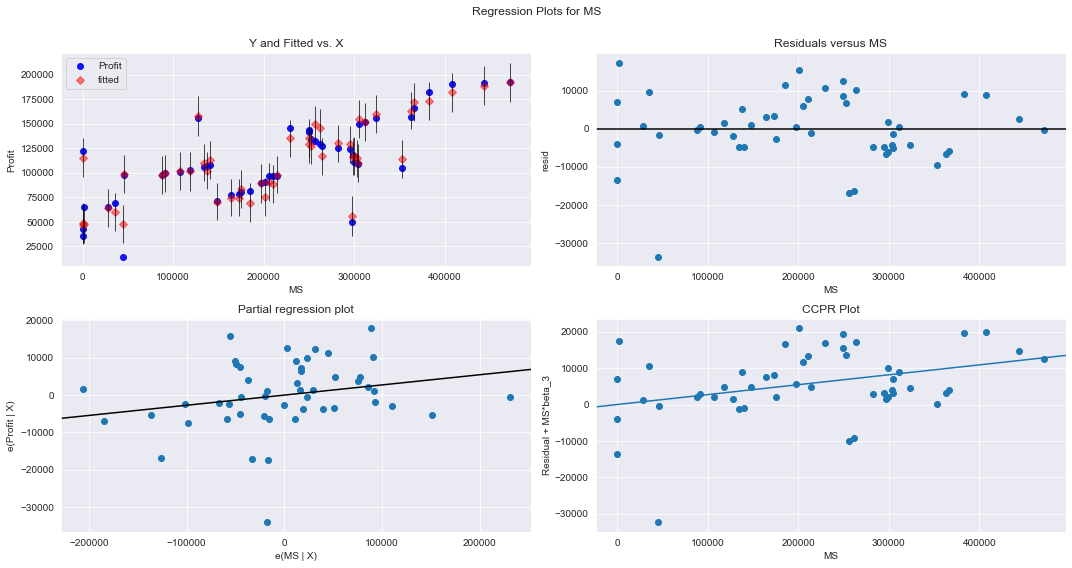

In [26]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, "MS", fig=fig)
plt.show()

# Model Deletion Diagnostics

## Detecting Influencers/Outliers

### Cook’s Distance

In [27]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

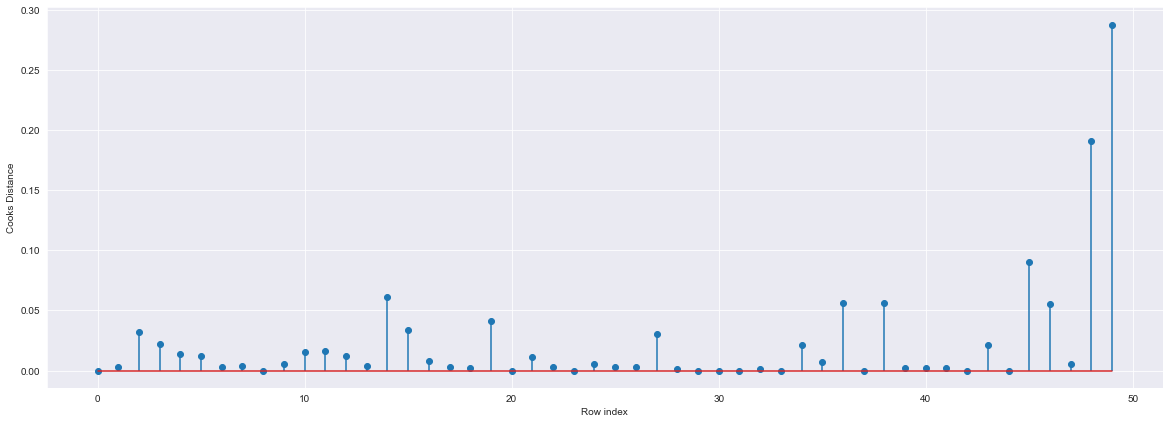

In [28]:
#Plot the influencers values using stem plot
fig = plt.figure(figsize=(20, 7))
plt.stem(np.arange(len(data1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [29]:
(np.argmax(c),np.max(c))

(49, 0.2880822927543267)

In [30]:
np.where(c>0.05)

(array([14, 36, 38, 45, 46, 48, 49], dtype=int64),)

## Improving the model

In [31]:
data2=data1.drop(data1.index[[14,36,38,45,46,49]],axis=0).reset_index(drop=True)
data2.head()

,RDS,ADMS,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [32]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RDS     44 non-null     float64
 1   ADMS    44 non-null     float64
 2   MS      44 non-null     float64
 3   State   44 non-null     object 
 4   Profit  44 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.8+ KB


## Building Final Model

In [33]:
final_model=smf.ols("Profit~RDS+ADMS+MS",data=data2).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     446.1
Date:                Fri, 13 Jan 2023   Prob (F-statistic):           9.12e-31
Time:                        13:30:50   Log-Likelihood:                -447.62
No. Observations:                  44   AIC:                             903.2
Df Residuals:                      40   BIC:                             910.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.721e+04   5026.329      9.392      0.000     3.7e+04    5.74e+04
RDS            0.8074      0.040     20.430      0.000       0.728       0.887
ADMS          -0.0007      0.039     -0.019      0.985      -0.079       0.078
MS             0.0268      0.013      1.983      0.054      -0.001       0.054
==============================================================================
Omnibus:                        0.085   Durbin-Watson:                   1.688
Prob(Omnibus):                  0.959   Jarque-Bera (JB):                0.191
Skew:                          -0.095   Prob(JB):                        0.909
Kurtosis:                       2.740   Cond. No.                     1.43e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Model Prediction

In [34]:
actual = data1["Profit"]

In [35]:
data1.drop('Profit',axis=1,inplace=True)

In [36]:
predict_Profit = model.predict(data1)

In [37]:
predict_Profit

0     192521.252890
1     189156.768232
2     182147.279096
3     173696.700026
4     172139.514183
5     163580.780571
6     158114.096669
7     160021.363048
8     151741.699699
9     154884.684110
10    135509.016367
11    135573.712961
12    129138.054182
13    127487.991663
14    149548.646335
15    146235.159985
16    116915.405401
17    130192.447208
18    129014.226806
19    115635.216367
20    116639.669231
21    117319.451640
22    114706.981717
23    109996.615221
24    113362.966113
25    102237.725065
26    110600.575350
27    114408.071457
28    101660.026005
29    101794.983452
30     99452.372936
31     97687.856276
32     99001.328985
33     97915.007805
34     89039.273741
35     90511.599568
36     75286.174585
37     89619.537708
38     69697.430648
39     83729.011977
40     74815.953991
41     74802.556239
42     70620.411821
43     60167.039963
44     64611.354916
45     47650.649687
46     56166.206853
47     46490.588983
48     49171.388158
49     48215.134111


## Table of R-squared of basic model and final model

In [38]:
data3={"Models":['Basic Model','Final Model'],"R Squared":[model.rsquared,final_model.rsquared]}
table=pd.DataFrame(data3)
print(table)

        Models  R Squared
0  Basic Model   0.950746
1  Final Model   0.970976


# Q.2. Toyota Corolla

## Importing Data

In [39]:
Corolla = pd.read_csv("ToyotaCorolla.csv",encoding="latin-1",usecols = ["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"])
Corolla.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


## EDA

In [40]:
Corolla.shape

(1436, 9)

In [41]:
Corolla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [42]:
Corolla.isnull().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [43]:
Corolla.duplicated().sum()

1

In [44]:
Corolla[Corolla.duplicated()]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [45]:
Corolla.drop_duplicates(inplace=True)

In [46]:
Corolla.reset_index(drop=True,inplace=True)

In [47]:
Corolla

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [48]:
Corolla.duplicated().sum()

0

In [49]:
Corolla.shape

(1435, 9)

## Scatter Plot

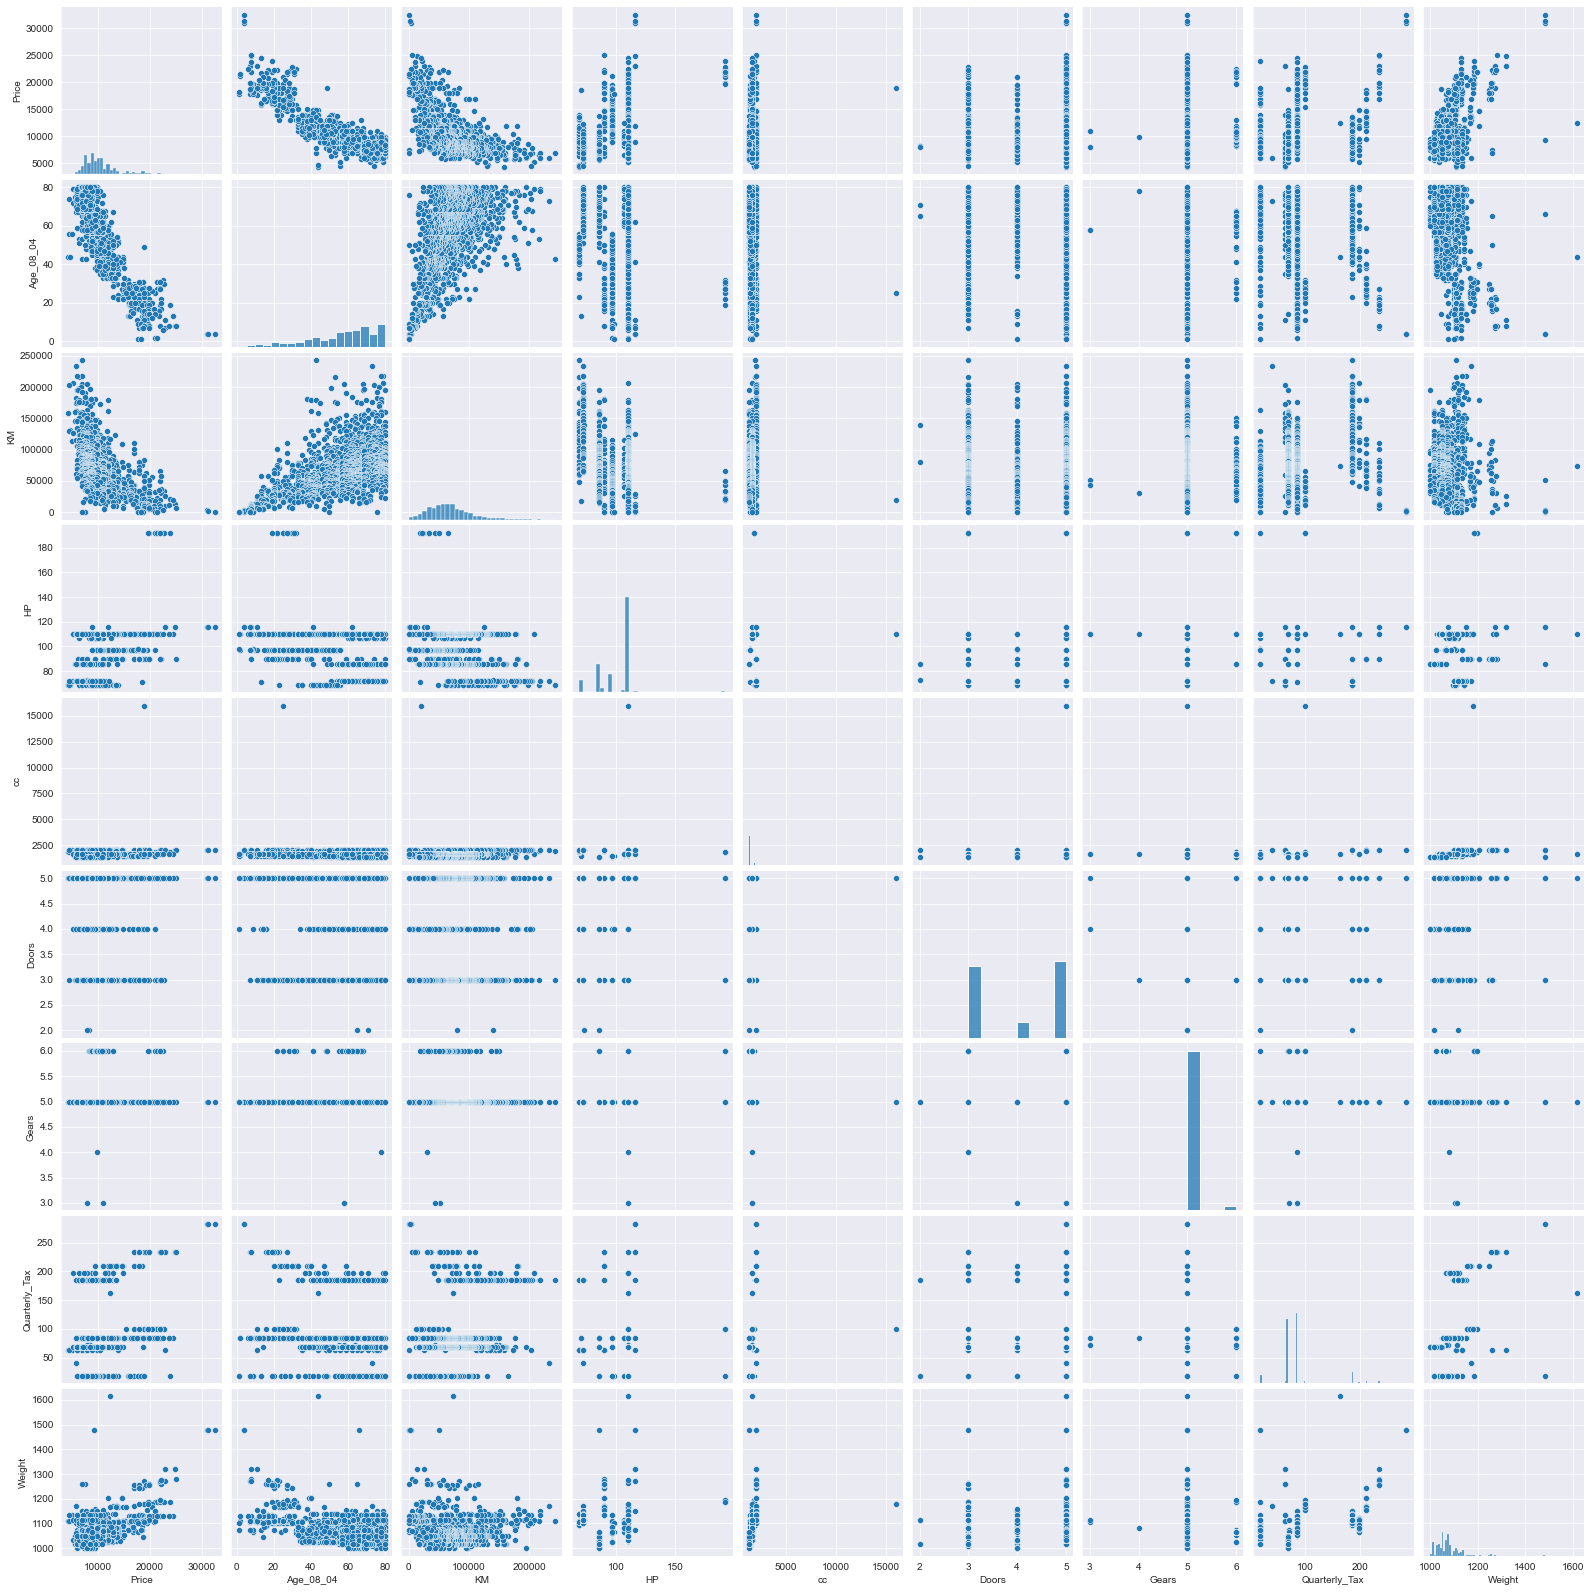

In [50]:
sns.pairplot(Corolla)

## Correlation Matrix

In [51]:
Corolla.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age_08_04,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
Quarterly_Tax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


<AxesSubplot:>

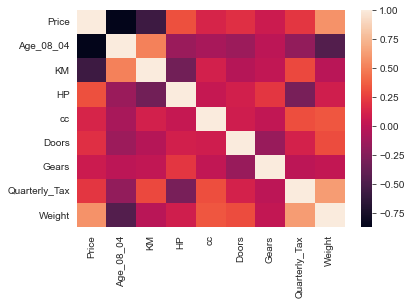

In [52]:
sns.heatmap(Corolla.corr())

## Building Model

In [53]:
model = smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data=Corolla).fit()

In [54]:
model.params

Intercept       -5472.540368
Age_08_04        -121.713891
KM                 -0.020737
HP                 31.584612
cc                 -0.118558
Doors              -0.920189
Gears             597.715894
Quarterly_Tax       3.858805
Weight             16.855470
dtype: float64

In [55]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Fri, 13 Jan 2023   Prob (F-statistic):               0.00
Time:                        13:31:30   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age_08_04      -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM               -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP               31.5846      2.818     11.210      0.000      26.058      37.112
cc               -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors            -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears           597.7159    196.969      3.035      0.002     211.335     984.097
Quarterly_Tax     3.8588      1.311      2.944      0.003       1.288       6.430
Weight           16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Calculating VIF

In [56]:
rsq_age=smf.ols('Age_08_04~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=Corolla).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_km=smf.ols('KM ~ Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=Corolla).fit().rsquared
vif_km=1/(1-rsq_km)

rsq_hp=smf.ols('HP ~ Age_08_04+KM+cc+Doors+Gears+Quarterly_Tax+Weight',data=Corolla).fit().rsquared
vif_hp=1/(1-rsq_hp)

rsq_cc=smf.ols('cc ~ Age_08_04+KM+HP+Doors+Gears+Quarterly_Tax+Weight',data=Corolla).fit().rsquared
vif_cc=1/(1-rsq_cc)

rsq_Doors=smf.ols('Doors ~ Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=Corolla).fit().rsquared
vif_Doors=1/(1-rsq_Doors)

rsq_Gears=smf.ols('Gears ~ Age_08_04+KM+HP+cc+Doors+Quarterly_Tax+Weight',data=Corolla).fit().rsquared
vif_Gears=1/(1-rsq_Gears)

rsq_Quarterly_Tax=smf.ols('Quarterly_Tax ~ Age_08_04+KM+HP+cc+Doors+Gears+Weight',data=Corolla).fit().rsquared
vif_Quarterly_Tax=1/(1-rsq_Quarterly_Tax)

rsq_Weight=smf.ols('Weight ~ Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax',data=Corolla).fit().rsquared
vif_Weight=1/(1-rsq_Weight)

d1={'Variables':['Age','KM','HP','CC','Doors','Gears','QT','Weight'],
    'VIF':['vif_age','vif_km','vif_hp','vif_cc','vif_Doors','vif_Gears','vif_Quarterly_Tax','vif_Weight']
   }
Vif_frame=pd.DataFrame(d1)
Vif_frame

,Variables,VIF
0,Age,vif_age
1,KM,vif_km
2,HP,vif_hp
3,CC,vif_cc
4,Doors,vif_Doors
5,Gears,vif_Gears
6,QT,vif_Quarterly_Tax
7,Weight,vif_Weight


## Residual Analysis

### Test for Normality of Residuals (Q-Q Plot)

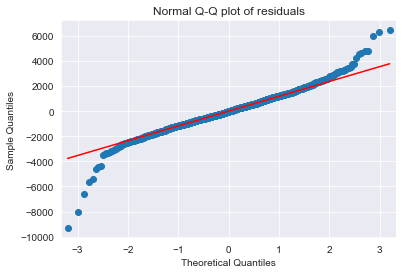

In [57]:
qqplot=sm.qqplot(model.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

### Residual Plot for Homoscedasticity

In [58]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

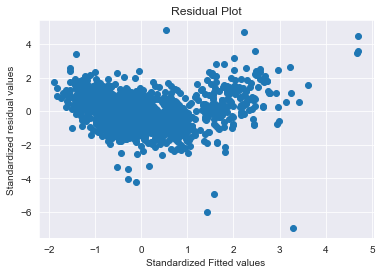

In [59]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

## Residual Vs Regressors

eval_env: 1


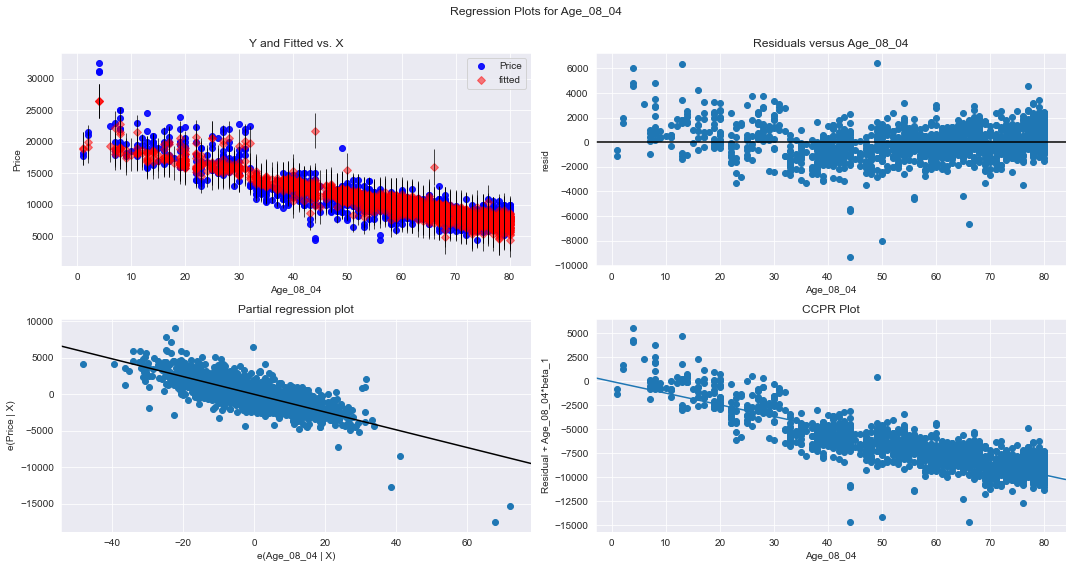

In [60]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"Age_08_04", fig=fig)
plt.show()

eval_env: 1


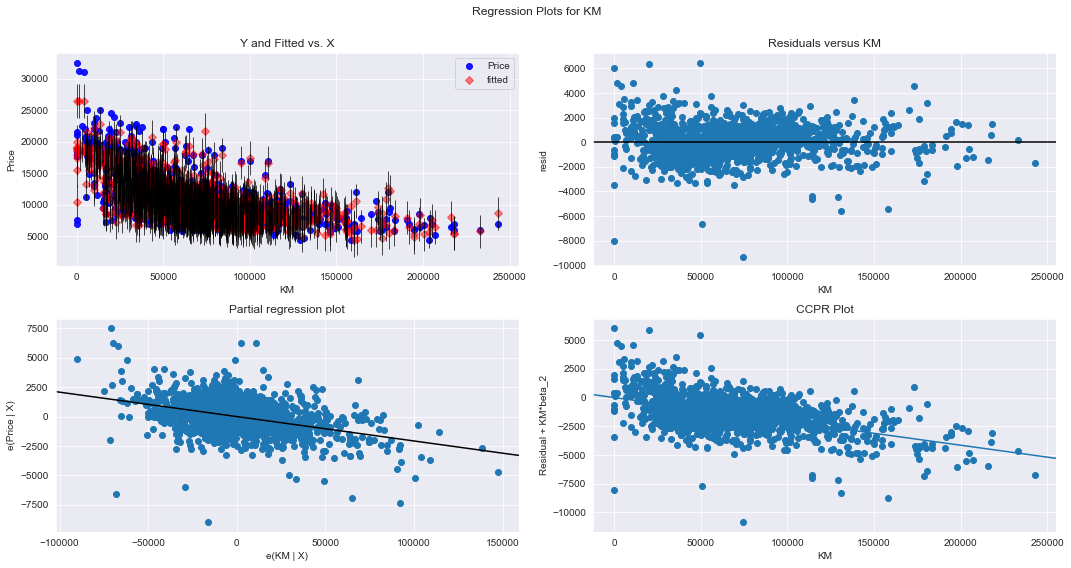

In [61]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"KM", fig=fig)
plt.show()

eval_env: 1


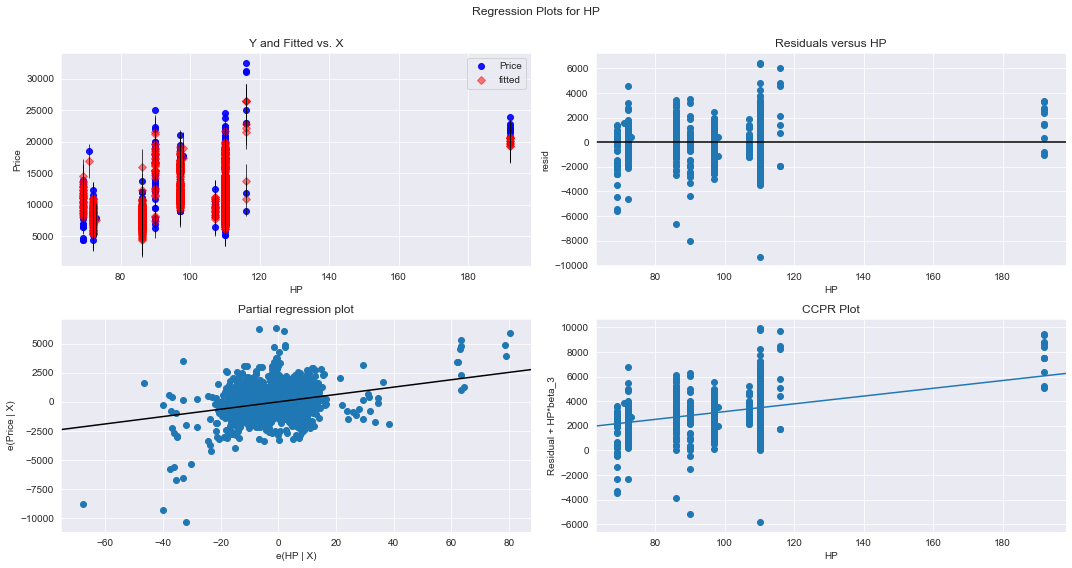

In [62]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"HP", fig=fig)
plt.show()

eval_env: 1


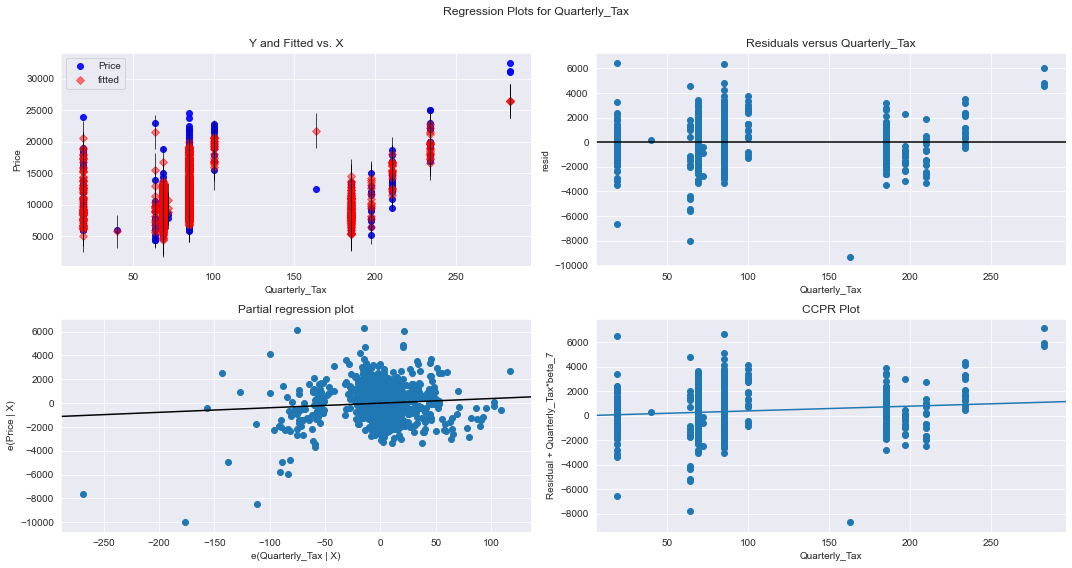

In [63]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"Quarterly_Tax", fig=fig)
plt.show()

eval_env: 1


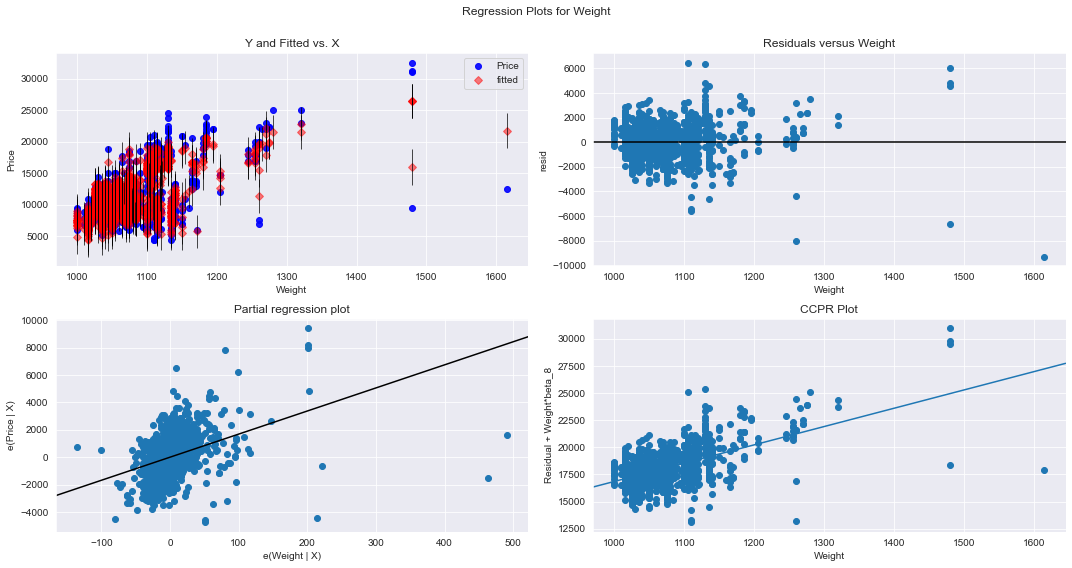

In [64]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"Weight", fig=fig)
plt.show()

# Model Deletion Diagnostics

## Detecting Influencers/Outliers

### Cook’s Distance

In [65]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

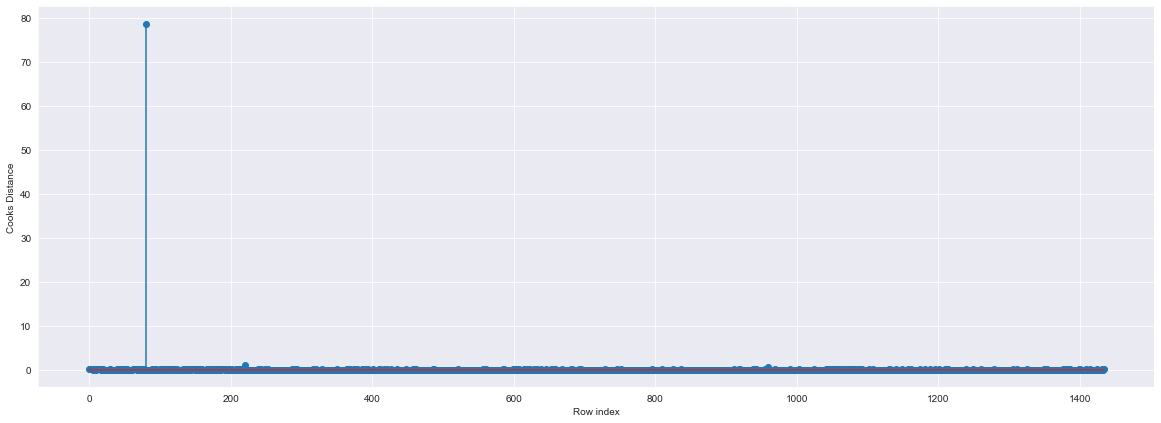

In [66]:
#Plot the influencers values using stem plot
fig = plt.figure(figsize=(20, 7))
plt.stem(np.arange(len(Corolla)), np.round(c, 5))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [67]:
(np.argmax(c),np.max(c))

(80, 78.72950582247552)

In [68]:
np.where(c>0.2)

(array([ 80, 220, 959], dtype=int64),)

## Improving the model

In [69]:
Corolla2=Corolla.drop(Corolla.index[[80,220,959]],axis=0).reset_index(drop=True)
Corolla2

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1427,7500,69,20544,86,1300,3,5,69,1025
1428,10845,72,19000,86,1300,3,5,69,1015
1429,8500,71,17016,86,1300,3,5,69,1015
1430,7250,70,16916,86,1300,3,5,69,1015


In [70]:
Corolla2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1432 entries, 0 to 1431
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1432 non-null   int64
 1   Age_08_04      1432 non-null   int64
 2   KM             1432 non-null   int64
 3   HP             1432 non-null   int64
 4   cc             1432 non-null   int64
 5   Doors          1432 non-null   int64
 6   Gears          1432 non-null   int64
 7   Quarterly_Tax  1432 non-null   int64
 8   Weight         1432 non-null   int64
dtypes: int64(9)
memory usage: 100.8 KB


## Building Final Model

In [71]:
final_model=smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data=Corolla2).fit()

In [72]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     1355.
Date:                Fri, 13 Jan 2023   Prob (F-statistic):               0.00
Time:                        13:31:41   Log-Likelihood:                -12218.
No. Observations:                1432   AIC:                         2.445e+04
Df Residuals:                    1423   BIC:                         2.450e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.468e+04   1436.358    -10.222      0.000   -1.75e+04   -1.19e+04
Age_08_04      -112.0629      2.481    -45.176      0.000    -116.929    -107.197
KM               -0.0170      0.001    -14.135      0.000      -0.019      -0.015
HP               36.5587      2.747     13.308      0.000      31.170      41.947
cc               -3.7852      0.303    -12.508      0.000      -4.379      -3.192
Doors          -121.9808     37.498     -3.253      0.001    -195.539     -48.423
Gears           466.6014    181.031      2.577      0.010     111.485     821.718
Quarterly_Tax     5.1754      1.373      3.770      0.000       2.482       7.869
Weight           30.5667      1.295     23.595      0.000      28.025      33.108
==============================================================================
Omnibus:                      121.369   Durbin-Watson:                   1.701
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              700.907
Skew:                          -0.078   Prob(JB):                    6.31e-153
Kurtosis:                       6.424   Cond. No.                     3.46e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.46e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Table of R-squared of basic model and final model

In [73]:
Corolla3={"Models":['Basic Model','Final Model'],"R Squared":[model.rsquared,final_model.rsquared]}
table=pd.DataFrame(Corolla3)
print(table)

        Models  R Squared
0  Basic Model   0.862520
1  Final Model   0.883968


## Model Prediction

In [74]:
actual = Corolla["Price"]

In [75]:
Corolla.drop('Price',axis=1,inplace=True)

In [76]:
predict_Price = model.predict(Corolla)

In [77]:
predict_Price

0       16791.958871
1       16253.800414
2       16779.635210
3       16405.789389
4       16200.217277
            ...     
1430     8794.255037
1431     8292.577342
1432     8455.434402
1433     8579.222041
1434    10396.087526
Length: 1435, dtype: float64